In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
salesdirty=pd.read_excel("C:/Users/Hassan Ahmed/Desktop/Data Science Cohort-1 FTI/Sales.Dirty.xls")

In [3]:
salesdirty.head()

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Ship Date
0,3.0,Male,Low,6,261.54,0.04,Regular Air,-213.25,38.94,35,25000,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,NaN
1,293.0,2012-10-01 00:00:00,High,49,10123,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,2012-10-02 00:00:00
2,293.0,2012-10-01 00:00:00,High,27,244.57,0.01,Regular Air,46.7075,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,2012-10-03 00:00:00
3,483.0,2011-07-10 00:00:00,High,NaN,4965.76,0.08,Regular Air,1198.97,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,2011-07-12 00:00:00
4,515.0,2010-08-28 00:00:00,Not Specified,19,394.27,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,2010-08-30 00:00:00


In [4]:
salesdirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 19 columns):
Order ID                7854 non-null float64
Order Date              8389 non-null object
Order Priority          8387 non-null object
Order Quantity          8398 non-null object
Sales                   8380 non-null object
Discount                8399 non-null float64
Ship Mode               8395 non-null object
Profit                  8399 non-null object
Unit Price              8399 non-null float64
Shipping Cost           8399 non-null object
Customer Name           8398 non-null object
Province                8399 non-null object
Region                  8369 non-null object
Customer Segment        8399 non-null object
Product Category        8368 non-null object
Product Sub-Category    8399 non-null object
Product Name            8386 non-null object
Product Container       8384 non-null object
Ship Date               8386 non-null object
dtypes: float64(3), object(16)
memo

In [63]:
salesdirty.describe()

,Order_ID,Order_Quantity,Sales,Discount,Profit,Unit_Price,Shipping_Cost
count,7573.000000,7573.000000,7573.000000,7573.000000,7573.000000,7573.000000,7573.000000
mean,30032.545359,25.553281,1757.811328,0.049721,170.853819,89.733349,13.039246
std,17312.272721,14.486043,3616.298471,0.031832,1211.320824,301.493827,17.502752
min,6.000000,1.000000,2.240000,0.000000,-14140.701600,0.990000,0.490000
25%,15009.000000,13.000000,140.590000,0.020000,-83.960000,6.480000,3.140000
50%,29860.000000,26.000000,431.370000,0.050000,-2.390000,20.950000,6.140000
75%,44679.000000,38.000000,1642.050000,0.080000,148.197500,83.930000,13.990000
max,59973.000000,50.000000,89061.050000,0.250000,27220.690000,6783.020000,164.730000


# Handling Missing and Incorrect Values in each Column one by one

# Univariate Analysis

In [5]:
salesdirty.columns

Index(['Order ID', 'Order Date', 'Order Priority', 'Order Quantity', 'Sales',
       'Discount', 'Ship Mode', 'Profit', 'Unit Price', 'Shipping Cost',
       'Customer Name', 'Province', 'Region', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Name',
       'Product Container', 'Ship Date'],
      dtype='object')

## Changing Column Names for Analysis

In [6]:
salesdirty.rename(columns={'Order ID':'Order_ID', 'Order Date':'Order_Date', 'Order Priority':'Order_Priority', 'Order Quantity':'Order_Quantity','Ship Mode':'Ship_Mode','Unit Price':'Unit_Price','Shipping Cost':'Shipping_Cost',
       'Customer Name':'Customer_Name','Customer Segment':'Customer_Segment',
       'Product Category':'Product_Category','Product Sub-Category':'Product_Sub_Category','Product Name':'Product_Name',
       'Product Container':'Product_container','Ship Date':'Ship_Date'},inplace=True)

In [7]:
salesdirty.columns

Index(['Order_ID', 'Order_Date', 'Order_Priority', 'Order_Quantity', 'Sales',
       'Discount', 'Ship_Mode', 'Profit', 'Unit_Price', 'Shipping_Cost',
       'Customer_Name', 'Province', 'Region', 'Customer_Segment',
       'Product_Category', 'Product_Sub_Category', 'Product_Name',
       'Product_container', 'Ship_Date'],
      dtype='object')

In [8]:
salesdirty.isnull().sum()

Order_ID                545
Order_Date               10
Order_Priority           12
Order_Quantity            1
Sales                    19
Discount                  0
Ship_Mode                 4
Profit                    0
Unit_Price                0
Shipping_Cost             0
Customer_Name             1
Province                  0
Region                   30
Customer_Segment          0
Product_Category         31
Product_Sub_Category      0
Product_Name             13
Product_container        15
Ship_Date                13
dtype: int64

## Droping all the rows in which most important Data is unavailable

In [9]:
salesdirty=salesdirty.dropna(how="any",subset=["Order_ID","Order_Date","Product_Name","Ship_Date"])
salesdirty=salesdirty.reset_index(drop=True)

### Order ID

In [10]:
salesdirty["Order_ID"]=salesdirty["Order_ID"].astype("int64")

### Order Date and Ship Date

In [11]:
salesdirty["Order_Date"]=pd.to_datetime(salesdirty["Order_Date"])
salesdirty["Ship_Date"]=pd.to_datetime(salesdirty["Ship_Date"])


In [12]:
salesdirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7819 entries, 0 to 7818
Data columns (total 19 columns):
Order_ID                7819 non-null int64
Order_Date              7819 non-null datetime64[ns]
Order_Priority          7807 non-null object
Order_Quantity          7818 non-null object
Sales                   7800 non-null object
Discount                7819 non-null float64
Ship_Mode               7815 non-null object
Profit                  7819 non-null object
Unit_Price              7819 non-null float64
Shipping_Cost           7819 non-null object
Customer_Name           7818 non-null object
Province                7819 non-null object
Region                  7789 non-null object
Customer_Segment        7819 non-null object
Product_Category        7790 non-null object
Product_Sub_Category    7819 non-null object
Product_Name            7819 non-null object
Product_container       7808 non-null object
Ship_Date               7819 non-null datetime64[ns]
dtypes: datetime64[ns

### Order Priority

In [13]:
salesdirty.Order_Priority=pd.Categorical(salesdirty.Order_Priority,["Low","Medium","High","Critical"],ordered=False)

In [14]:
salesdirty.isnull().sum()

Order_ID                   0
Order_Date                 0
Order_Priority          1576
Order_Quantity             1
Sales                     19
Discount                   0
Ship_Mode                  4
Profit                     0
Unit_Price                 0
Shipping_Cost              0
Customer_Name              1
Province                   0
Region                    30
Customer_Segment           0
Product_Category          29
Product_Sub_Category       0
Product_Name               0
Product_container         11
Ship_Date                  0
dtype: int64

In [15]:
salesdirty["Order_Priority"].fillna("Medium",inplace=True)

In [16]:
salesdirty.isnull().sum()

Order_ID                 0
Order_Date               0
Order_Priority           0
Order_Quantity           1
Sales                   19
Discount                 0
Ship_Mode                4
Profit                   0
Unit_Price               0
Shipping_Cost            0
Customer_Name            1
Province                 0
Region                  30
Customer_Segment         0
Product_Category        29
Product_Sub_Category     0
Product_Name             0
Product_container       11
Ship_Date                0
dtype: int64

### Order Quantity

In [17]:
cnt=0
for row in salesdirty["Order_Quantity"]:
    if any(c.isalpha() for c in str(row)):
        salesdirty.loc[cnt,"Order_Quantity"]=np.nan
    cnt+=1
salesdirty=salesdirty.dropna(how="any",subset=["Order_Quantity"])
salesdirty=salesdirty.reset_index(drop=True)
salesdirty["Order_Quantity"]=salesdirty["Order_Quantity"].astype("int64")

### Sales

In [18]:
cnt=0
for row in salesdirty["Sales"]:
    if any(c.isalpha() for c in str(row)):
        salesdirty.loc[cnt,"Sales"]=np.nan
    cnt+=1
salesdirty=salesdirty.dropna(how="any",subset=["Sales"])
salesdirty=salesdirty.reset_index(drop=True)
salesdirty["Sales"]=salesdirty["Sales"].astype("float64")

### Discount

In [19]:
cnt=0
for row in salesdirty["Discount"]:
    if any(c.isalpha() for c in str(row)):
        salesdirty.loc[cnt,"Discount"]=np.nan
    cnt+=1
salesdirty=salesdirty.dropna(how="any",subset=["Discount"])
salesdirty=salesdirty.reset_index(drop=True)
salesdirty["Discount"]=salesdirty["Discount"].astype("float64")

### Ship Mode

In [20]:
salesdirty.Ship_Mode=pd.Categorical(salesdirty.Ship_Mode,["Regular Air","Delivery Truck","Express Air"],ordered=False)

In [21]:
salesdirty["Ship_Mode"].fillna("Regular Air",inplace=True)

In [22]:
salesdirty.isnull().sum()

Order_ID                 0
Order_Date               0
Order_Priority           0
Order_Quantity           0
Sales                    0
Discount                 0
Ship_Mode                0
Profit                   0
Unit_Price               0
Shipping_Cost            0
Customer_Name            1
Province                 0
Region                  30
Customer_Segment         0
Product_Category        29
Product_Sub_Category     0
Product_Name             0
Product_container       11
Ship_Date                0
dtype: int64

### Profit

In [23]:
cnt=0
for row in salesdirty["Profit"]:
    if any(c.isalpha() for c in str(row)):
        salesdirty.loc[cnt,"Profit"]=np.nan
    cnt+=1

In [24]:
salesdirty=salesdirty.dropna(how="any",subset=["Profit"])
salesdirty=salesdirty.reset_index(drop=True)
salesdirty["Profit"]=salesdirty["Profit"].astype("float64")

### Unit Price

In [25]:
cnt=0
for row in salesdirty["Unit_Price"]:
    if any(c.isalpha() for c in str(row)):
        salesdirty.loc[cnt,"Unit_Price"]=np.nan
    cnt+=1

In [26]:
salesdirty=salesdirty.dropna(how="any",subset=["Unit_Price"])
salesdirty=salesdirty.reset_index(drop=True)

### Shipping Cost

In [27]:
cnt=0
for row in salesdirty["Shipping_Cost"]:
    if any(c.isalpha() for c in str(row)):
        salesdirty.loc[cnt,"Shipping_Cost"]=np.nan
    cnt+=1
salesdirty=salesdirty.dropna(how="any",subset=["Shipping_Cost"])
salesdirty=salesdirty.reset_index(drop=True)
salesdirty["Shipping_Cost"]=salesdirty["Shipping_Cost"].astype("float64")

In [28]:
salesdirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7778 entries, 0 to 7777
Data columns (total 19 columns):
Order_ID                7778 non-null int64
Order_Date              7778 non-null datetime64[ns]
Order_Priority          7778 non-null category
Order_Quantity          7778 non-null int64
Sales                   7778 non-null float64
Discount                7778 non-null float64
Ship_Mode               7778 non-null category
Profit                  7778 non-null float64
Unit_Price              7778 non-null float64
Shipping_Cost           7778 non-null float64
Customer_Name           7777 non-null object
Province                7778 non-null object
Region                  7748 non-null object
Customer_Segment        7778 non-null object
Product_Category        7749 non-null object
Product_Sub_Category    7778 non-null object
Product_Name            7778 non-null object
Product_container       7767 non-null object
Ship_Date               7778 non-null datetime64[ns]
dtypes: categor

### Customer Name

In [29]:
cnt=0
for row in salesdirty["Customer_Name"]:
    if any(c.isnumeric() for c in str(row)):
        salesdirty.loc[cnt,"Customer_Name"]=np.nan
    cnt+=1
salesdirty=salesdirty.dropna(how="any",subset=["Customer_Name"])
salesdirty=salesdirty.reset_index(drop=True)

### Province

In [30]:
salesdirty["Province"].unique()

array(['Nunavut', 'Northwest Territories', 'Prince Edward Island',
       'Manitoba', 'British Columbia', 'Nova Scotia', 'Ontario',
       'Newfoundland', 'Quebec', 'New Brunswick', 'Saskachewan', 'Yukon',
       'Alberta'], dtype=object)

### Region

In [31]:
salesdirty.loc[salesdirty['Province'] == "Quebec", 'Region'] ="Quebec"

In [32]:
salesdirty.loc[salesdirty['Province'] == "Saskachewan", 'Region'] ="Saskachewan"

In [33]:
salesdirty.isnull().sum()

Order_ID                 0
Order_Date               0
Order_Priority           0
Order_Quantity           0
Sales                    0
Discount                 0
Ship_Mode                0
Profit                   0
Unit_Price               0
Shipping_Cost            0
Customer_Name            0
Province                 0
Region                   0
Customer_Segment         0
Product_Category        29
Product_Sub_Category     0
Product_Name             0
Product_container       11
Ship_Date                0
dtype: int64

### Customer Segment

In [34]:
salesdirty.Customer_Segment=pd.Categorical(salesdirty.Customer_Segment,["Consumer","Home Office","Small Business","Corporate"],ordered=False)

In [35]:
salesdirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7756 entries, 0 to 7755
Data columns (total 19 columns):
Order_ID                7756 non-null int64
Order_Date              7756 non-null datetime64[ns]
Order_Priority          7756 non-null category
Order_Quantity          7756 non-null int64
Sales                   7756 non-null float64
Discount                7756 non-null float64
Ship_Mode               7756 non-null category
Profit                  7756 non-null float64
Unit_Price              7756 non-null float64
Shipping_Cost           7756 non-null float64
Customer_Name           7756 non-null object
Province                7756 non-null object
Region                  7756 non-null object
Customer_Segment        7756 non-null category
Product_Category        7727 non-null object
Product_Sub_Category    7756 non-null object
Product_Name            7756 non-null object
Product_container       7745 non-null object
Ship_Date               7756 non-null datetime64[ns]
dtypes: categ

## Product Category

In [36]:
salesdirty["Product_Category"].unique()

array(['Office Supplies', 'Furniture', 'Technology', nan], dtype=object)

In [37]:
Li=['Appliances','Storage & Organization','Paper','Envelopes','Pens & Art Supplies','Labels','Binders and Binder Accessories','Scissors, Rulers and Trimmers']

In [38]:
cnt=0
for row in salesdirty["Product_Sub_Category"]:
    for i in range(len(Li)):
        if (salesdirty.loc[cnt,"Product_Sub_Category"]== Li[i]):
            salesdirty.loc[cnt,"Product_Category"]="Office Supplies"
    cnt+=1

In [39]:
salesdirty["Product_Category"].isnull().sum()

12

In [40]:
cnt=0
for row in salesdirty["Product_Sub_Category"]:
    if (salesdirty.loc[cnt,"Product_Sub_Category"]=="Tables") or (salesdirty.loc[cnt,"Product_Sub_Category"]=="Office Furnishings") or (salesdirty.loc[cnt,"Product_Sub_Category"]=="Chairs & Chairmats"):
        salesdirty.loc[cnt,"Product_Category"]="Furniture"
    cnt+=1

In [41]:
cnt=0
for row in salesdirty["Product_Sub_Category"]:
    if (salesdirty.loc[cnt,"Product_Sub_Category"]=="Office Machines") or (salesdirty.loc[cnt,"Product_Sub_Category"]=="Telephones and Communication") or (salesdirty.loc[cnt,"Product_Sub_Category"]=="Computer Peripherals"):
        salesdirty.loc[cnt,"Product_Category"]="Technology"
    cnt+=1

In [42]:
salesdirty.isnull().sum()

Order_ID                 0
Order_Date               0
Order_Priority           0
Order_Quantity           0
Sales                    0
Discount                 0
Ship_Mode                0
Profit                   0
Unit_Price               0
Shipping_Cost            0
Customer_Name            0
Province                 0
Region                   0
Customer_Segment         0
Product_Category         0
Product_Sub_Category     0
Product_Name             0
Product_container       11
Ship_Date                0
dtype: int64

In [43]:
salesdirty.Product_Category=pd.Categorical(salesdirty.Product_Category,['Office Supplies', 'Furniture', 'Technology'],ordered=False)

### Product Sub Category

In [44]:
salesdirty["Product_Sub_Category"].unique()

array(['Appliances', 'Binders and Binder Accessories',
       'Storage & Organization', 'Paper', 'Office Furnishings',
       'Envelopes', 'Tables', 'Telephones and Communication',
       'Rubber Bands', 'Computer Peripherals', 'Pens & Art Supplies',
       'Copiers and Fax', 'Labels', 'Chairs & Chairmats',
       'Scissors, Rulers and Trimmers', 'Bookcases', 'Office Machines'],
      dtype=object)

In [45]:
salesdirty.Product_Sub_Category=pd.Categorical(salesdirty.Product_Sub_Category,['Appliances', 'Binders and Binder Accessories',
       'Storage & Organization', 'Paper', 'Office Furnishings',
       'Envelopes', 'Tables', 'Telephones and Communication',
       'Rubber Bands', 'Computer Peripherals', 'Pens & Art Supplies',
       'Copiers and Fax', 'Labels', 'Chairs & Chairmats',
       'Scissors, Rulers and Trimmers', 'Bookcases', 'Office Machines'],ordered=False)

In [46]:
salesdirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7756 entries, 0 to 7755
Data columns (total 19 columns):
Order_ID                7756 non-null int64
Order_Date              7756 non-null datetime64[ns]
Order_Priority          7756 non-null category
Order_Quantity          7756 non-null int64
Sales                   7756 non-null float64
Discount                7756 non-null float64
Ship_Mode               7756 non-null category
Profit                  7756 non-null float64
Unit_Price              7756 non-null float64
Shipping_Cost           7756 non-null float64
Customer_Name           7756 non-null object
Province                7756 non-null object
Region                  7756 non-null object
Customer_Segment        7756 non-null category
Product_Category        7756 non-null category
Product_Sub_Category    7756 non-null category
Product_Name            7756 non-null object
Product_container       7745 non-null object
Ship_Date               7756 non-null datetime64[ns]
dtypes: c

## Product Name

In [47]:
cnt=0
for row in salesdirty["Product_Name"]:
    if all(c.isnumeric() for c in str(row)):
        salesdirty.loc[cnt,"Product_Name"]=np.nan
    cnt+=1

In [48]:
salesdirty.isnull().sum()

Order_ID                  0
Order_Date                0
Order_Priority            0
Order_Quantity            0
Sales                     0
Discount                  0
Ship_Mode                 0
Profit                    0
Unit_Price                0
Shipping_Cost             0
Customer_Name             0
Province                  0
Region                    0
Customer_Segment          0
Product_Category          0
Product_Sub_Category      0
Product_Name            183
Product_container        11
Ship_Date                 0
dtype: int64

In [49]:
salesdirty=salesdirty.dropna(how="any",subset=["Product_Name"])
salesdirty=salesdirty.reset_index(drop=True)

In [50]:
salesdirty.isnull().sum()

Order_ID                 0
Order_Date               0
Order_Priority           0
Order_Quantity           0
Sales                    0
Discount                 0
Ship_Mode                0
Profit                   0
Unit_Price               0
Shipping_Cost            0
Customer_Name            0
Province                 0
Region                   0
Customer_Segment         0
Product_Category         0
Product_Sub_Category     0
Product_Name             0
Product_container       11
Ship_Date                0
dtype: int64

## Product Container

In [51]:
salesdirty["Product_container"].unique()

array(['Jumbo Drum', 'Small Box', 'Medium Box', 'Large Box', 'Wrap Bag',
       'Small Pack', 'Jumbo Box', nan], dtype=object)

In [52]:
salesdirty.loc[pd.isnull(salesdirty["Product_container"]),"Product_container"]="Small Box"

In [53]:
salesdirty.isnull().sum()

Order_ID                0
Order_Date              0
Order_Priority          0
Order_Quantity          0
Sales                   0
Discount                0
Ship_Mode               0
Profit                  0
Unit_Price              0
Shipping_Cost           0
Customer_Name           0
Province                0
Region                  0
Customer_Segment        0
Product_Category        0
Product_Sub_Category    0
Product_Name            0
Product_container       0
Ship_Date               0
dtype: int64

### Now that all the missing and incorrect values are filtered and replaced appropriately with some exceptions so now we move on plotting all the relative plots for different columns

## Line and Box Plots of all Numeric Variables

In [54]:
sales_clean=salesdirty

In [55]:
sales_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7573 entries, 0 to 7572
Data columns (total 19 columns):
Order_ID                7573 non-null int64
Order_Date              7573 non-null datetime64[ns]
Order_Priority          7573 non-null category
Order_Quantity          7573 non-null int64
Sales                   7573 non-null float64
Discount                7573 non-null float64
Ship_Mode               7573 non-null category
Profit                  7573 non-null float64
Unit_Price              7573 non-null float64
Shipping_Cost           7573 non-null float64
Customer_Name           7573 non-null object
Province                7573 non-null object
Region                  7573 non-null object
Customer_Segment        7573 non-null category
Product_Category        7573 non-null category
Product_Sub_Category    7573 non-null category
Product_Name            7573 non-null object
Product_container       7573 non-null object
Ship_Date               7573 non-null datetime64[ns]
dtypes: c

In [64]:
sales_clean.describe()

,Order_ID,Order_Quantity,Sales,Discount,Profit,Unit_Price,Shipping_Cost
count,7573.000000,7573.000000,7573.000000,7573.000000,7573.000000,7573.000000,7573.000000
mean,30032.545359,25.553281,1757.811328,0.049721,170.853819,89.733349,13.039246
std,17312.272721,14.486043,3616.298471,0.031832,1211.320824,301.493827,17.502752
min,6.000000,1.000000,2.240000,0.000000,-14140.701600,0.990000,0.490000
25%,15009.000000,13.000000,140.590000,0.020000,-83.960000,6.480000,3.140000
50%,29860.000000,26.000000,431.370000,0.050000,-2.390000,20.950000,6.140000
75%,44679.000000,38.000000,1642.050000,0.080000,148.197500,83.930000,13.990000
max,59973.000000,50.000000,89061.050000,0.250000,27220.690000,6783.020000,164.730000


Text(0.5, 1.0, 'Shipping_Cost')

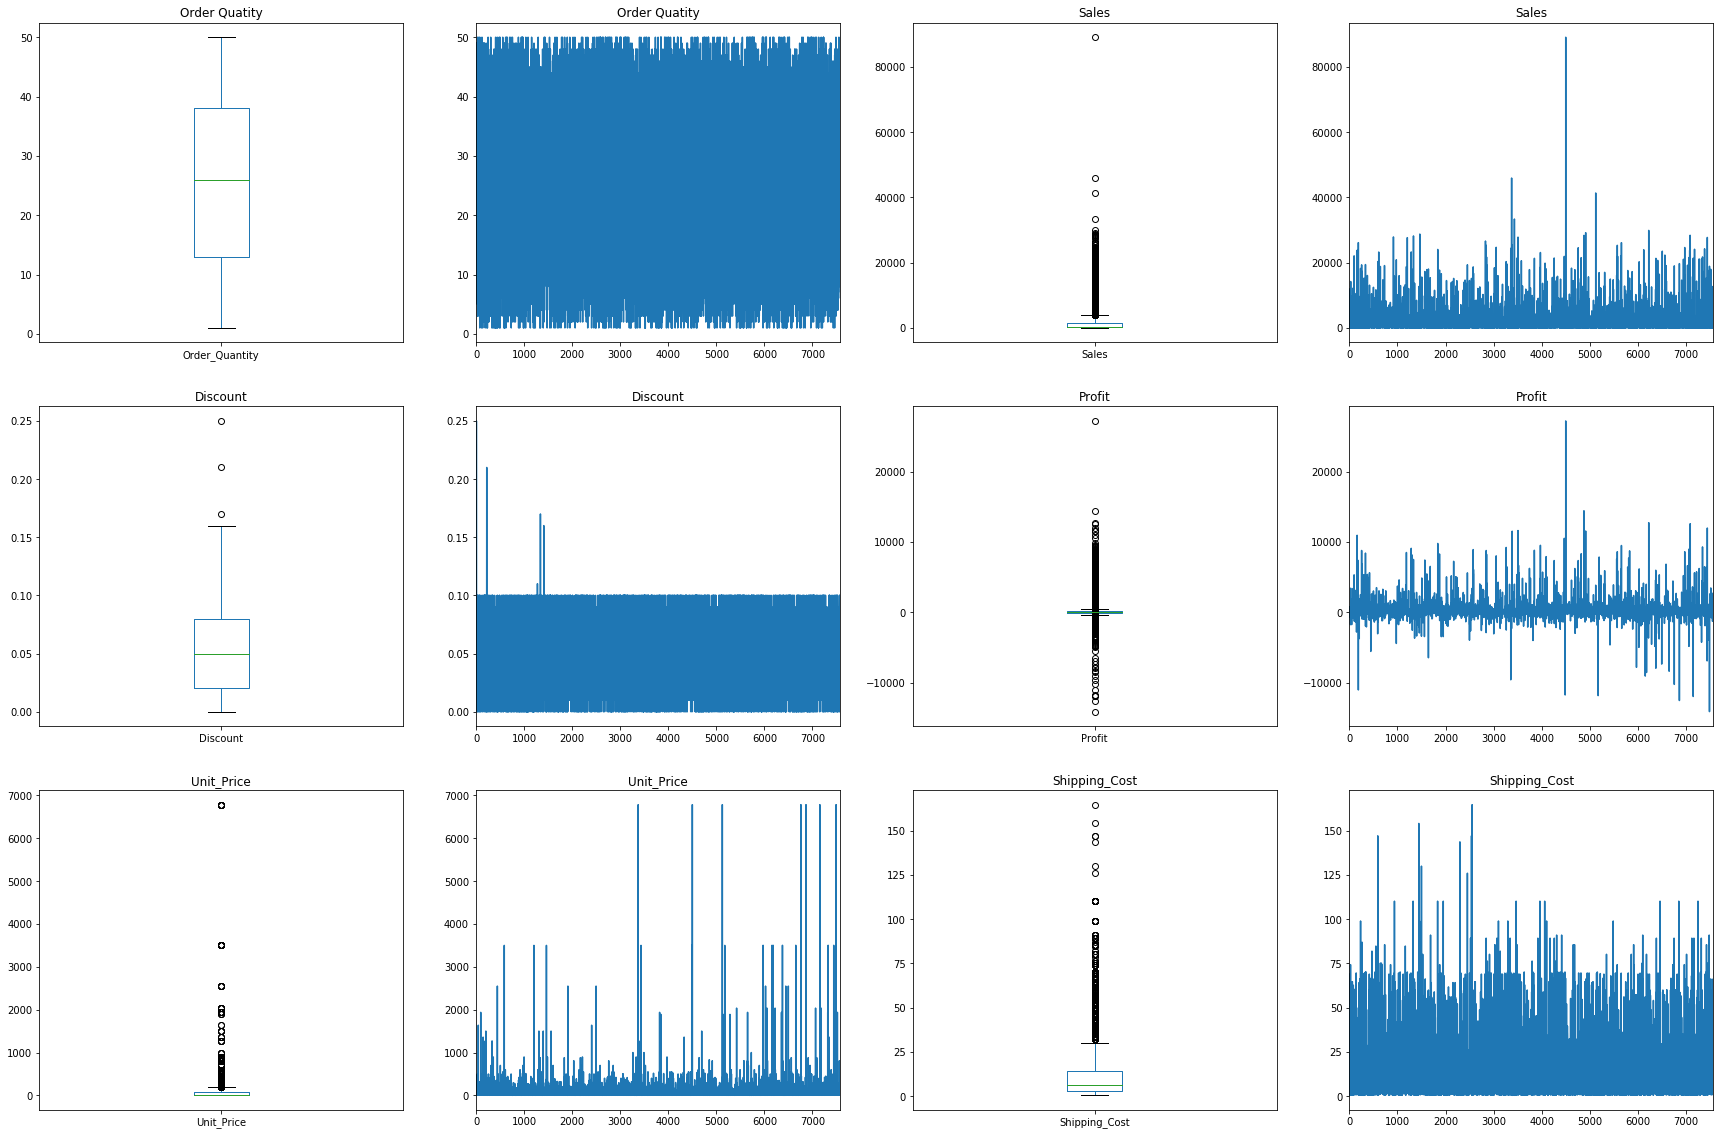

In [56]:
fig=plt.figure(figsize=(30,20))
ax1=fig.add_subplot(3,4,1)
sales_clean["Order_Quantity"].plot(kind="box")
ax2=fig.add_subplot(3,4,2)
sales_clean["Order_Quantity"].plot(kind="line")
ax1.set_title("Order Quatity")
ax2.set_title("Order Quatity")
## Sales
ax3=fig.add_subplot(3,4,3)
sales_clean["Sales"].plot(kind="box",)
ax4=fig.add_subplot(3,4,4)
sales_clean["Sales"].plot(kind="line")
ax3.set_title("Sales")
ax4.set_title("Sales")
## Discount
ax5=fig.add_subplot(3,4,5)
sales_clean["Discount"].plot(kind="box",)
ax6=fig.add_subplot(3,4,6)
sales_clean["Discount"].plot(kind="line")
ax5.set_title("Discount")
ax6.set_title("Discount")
## Profit
ax7=fig.add_subplot(3,4,7)
sales_clean["Profit"].plot(kind="box",)
ax8=fig.add_subplot(3,4,8)
sales_clean["Profit"].plot(kind="line")
ax7.set_title("Profit")
ax8.set_title("Profit")
## Unit_Price   
ax9=fig.add_subplot(3,4,9)
sales_clean["Unit_Price"].plot(kind="box",)
ax10=fig.add_subplot(3,4,10)
sales_clean["Unit_Price"].plot(kind="line")
ax9.set_title("Unit_Price")
ax10.set_title("Unit_Price")
## Shipping_Cost
ax11=fig.add_subplot(3,4,11)
sales_clean["Shipping_Cost"].plot(kind="box",)
ax12=fig.add_subplot(3,4,12)
sales_clean["Shipping_Cost"].plot(kind="line")
ax11.set_title("Shipping_Cost")
ax12.set_title("Shipping_Cost")


# Installing Pandas Profiling API so that we can create an interactive report which prints each and every thing which is required for all variable

## By this Library Histograms will also be plotted automatically for all categorical variables and much more

In [57]:
!pip install pandas-profiling

In [58]:
import pandas_profiling

In [59]:
sales_clean.profile_report(style={'full_width':True})

In [60]:
profile = sales_clean.profile_report()
rejected_variables = profile.get_rejected_variables(threshold=0.9)

In [61]:
profile = sales_clean.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="output.html")

In [62]:
sales_clean.to_excel("C:/Users/Hassan Ahmed/Desktop/Data Science Cohort-1 FTI/sales_clean.xls",index=False)